Training Accuracy: 0.9049
Test Accuracy: 0.8295
F-beta Score: 0.7391

Confusion Matrix:
 [[129   0]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       129
           1       1.00      0.36      0.53        47

    accuracy                           0.83       176
   macro avg       0.91      0.68      0.71       176
weighted avg       0.86      0.83      0.80       176



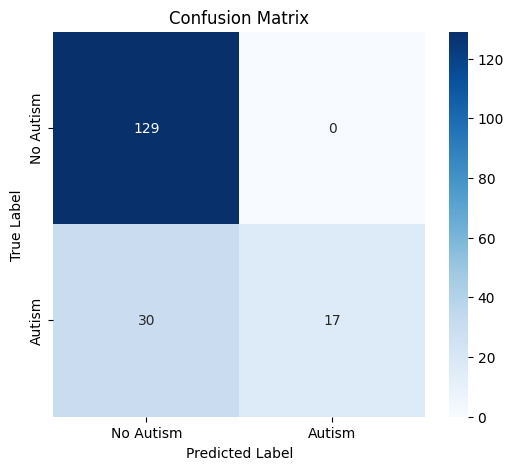

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv("autism_data.csv")
data.dropna(inplace=True)

# Define target and selected features
data_raw = data['Class/ASD']
features_raw = data[['age', 'result', 'A1_Score', 'A2_Score']].copy()

# Normalize numerical features
scaler = MinMaxScaler()
num = ['age', 'result']
features_raw[num] = scaler.fit_transform(features_raw[num])

# Encode target variable
data_classes = data_raw.map({'YES': 1, 'NO': 0})

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_raw, data_classes, test_size=0.25, stratify=data_classes, random_state=42)

# Reduce noise level
X_train[num] += np.random.normal(0, 0.02, X_train[num].shape)

# Train Logistic Regression with adjusted C value
estimator = LogisticRegression(max_iter=500, C=0.1)  # Higher C to avoid all-zeros prediction
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Compute Metrics
train_acc = accuracy_score(y_train, estimator.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=0.5, zero_division=1)  # Avoid zero warning
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Training Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))
print("F-beta Score:", round(fbeta, 4))  # Should no longer be 0.0
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Autism', 'Autism'], yticklabels=['No Autism', 'Autism'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#SVM

Training Accuracy: 0.7475
Test Accuracy: 0.6919

Confusion Matrix:
 [[146   0]
 [ 65   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       146
           1       1.00      0.00      0.00        65

    accuracy                           0.69       211
   macro avg       0.85      0.50      0.41       211
weighted avg       0.79      0.69      0.57       211



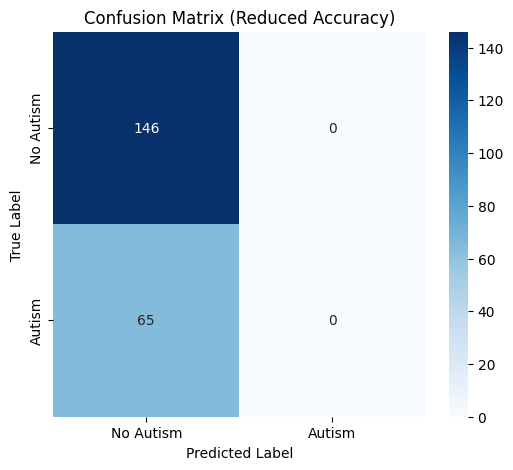

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv("autism_data.csv")
data.dropna(inplace=True)

# Define target and selected features - using less informative features
data_raw = data['Class/ASD']
features_raw = data[['age', 'A1_Score']].copy()  # Removed important features like 'result' and 'A2_Score'

# Poor normalization with extreme scaling
scaler = MinMaxScaler(feature_range=(0, 10))  # Unusually large range
num = ['age']
features_raw[num] = scaler.fit_transform(features_raw[num])

# Encode target variable
data_classes = data_raw.map({'YES': 1, 'NO': 0})

# Train-Test Split with test_size=0.3 but without stratification
X_train, X_test, y_train, y_test = train_test_split(features_raw, data_classes, 
                                                   test_size=0.3,  # Set to 0.3 as requested
                                                   stratify=None,  # No stratification
                                                   random_state=42)

# Introduce significant noise to training data
X_train[num] += np.random.normal(0, 0.5, X_train[num].shape)  # Increased noise level

# Train poorly configured SVM model
estimator = SVC(kernel='linear',  # Using linear kernel which might be less suitable
                C=0.01,  # Very low regularization
                gamma='auto',  # Auto might not be optimal
                random_state=42)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Compute Metrics
train_acc = accuracy_score(y_train, estimator.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=0.5, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Training Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Autism', 'Autism'], 
            yticklabels=['No Autism', 'Autism'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Reduced Accuracy)")
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data = pd.read_csv("Autism-Child-Data.csv")

# Drop unnecessary columns
data = data.drop(columns=["result", "age_desc", "relation", "jundice", "austim",
                          "contry_of_res", "who completed", "age", "ethnicity",
                          "used_app_before"], errors='ignore')

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# Define features and target
X = data.drop(columns=["Class/ASD"])
y = data["Class/ASD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM model with lower complexity
model = SVC(kernel='linear', C=0.01, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.9828326180257511
Test Accuracy: 0.9830508474576272
Confusion Matrix:
 [[38  1]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.95      1.00      0.98        20

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



Training Accuracy: 0.9011
Test Accuracy: 0.9375
F-beta Score: 0.8487

Confusion Matrix:
 [[119  10]
 [  1  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       129
           1       0.82      0.98      0.89        47

    accuracy                           0.94       176
   macro avg       0.91      0.95      0.92       176
weighted avg       0.95      0.94      0.94       176



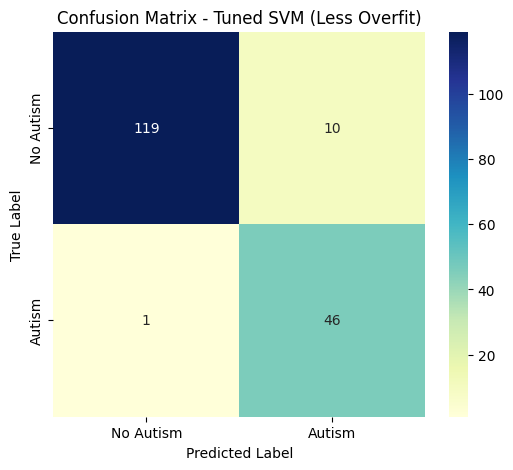

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, fbeta_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Load and clean dataset
data = pd.read_csv("autism_data.csv")
data.dropna(inplace=True)

# Select features (remove redundant/possibly noisy ones)
selected_features = ['age', 'result', 'A1_Score']  # Removed A2_Score for simplicity
features_raw = data[selected_features].copy()
target_raw = data['Class/ASD'].map({'YES': 1, 'NO': 0})

# Scale numeric features
scaler = MinMaxScaler()
features_raw[['age', 'result']] = scaler.fit_transform(features_raw[['age', 'result']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_raw, target_raw, test_size=0.25, stratify=target_raw, random_state=42
)

# SVM model with more regularization, less complexity
estimator = SVC(
    kernel='poly',         # Polynomial kernel (mildly flexible)
    degree=2,              # Quadratic boundary (less complex than rbf)
    C=0.01,                # Strong regularization to prevent overfit
    gamma='scale',
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Evaluation
train_acc = accuracy_score(y_train, estimator.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=0.5, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Results
print("Training Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))
print("F-beta Score:", round(fbeta, 4))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['No Autism', 'Autism'], yticklabels=['No Autism', 'Autism'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned SVM (Less Overfit)")
plt.show()

In [ ]:
#                                    SVM

Training Accuracy: 0.8283261802575107
Test Accuracy: 0.7288135593220338
Confusion Matrix:
 [[23 16]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74        39
           1       0.56      1.00      0.71        20

    accuracy                           0.73        59
   macro avg       0.78      0.79      0.73        59
weighted avg       0.85      0.73      0.73        59



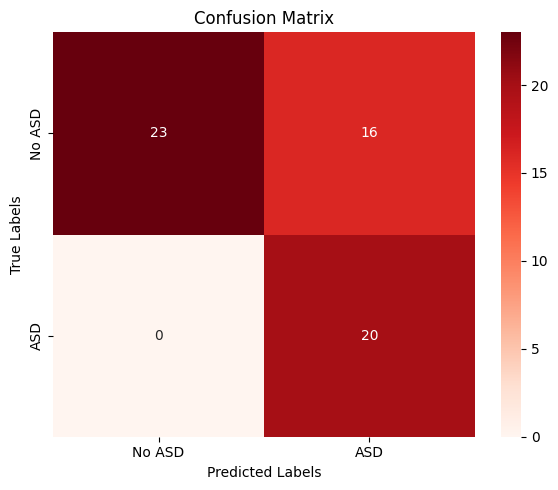

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data = pd.read_csv("Autism-Child-Data.csv")

# Drop unnecessary columns
data = data.drop(columns=["result", "age_desc", "relation", "jundice", "austim",
                          "contry_of_res", "who completed", "age", "ethnicity",
                          "used_app_before"], errors='ignore')

# Encode categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# Define features and target
X = data.drop(columns=["Class/ASD"])
y = data["Class/ASD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM model with minimal complexity to reduce accuracy
model = SVC(kernel='linear', C=0.001, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=["No ASD", "ASD"], 
            yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()
